<a href="https://colab.research.google.com/github/sonalisanjeevprabu18/Neural-Network-and-Deep-Learning/blob/main/CreditCard_FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5697/5697 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9883 - loss: 0.0399 - val_accuracy: 0.9993 - val_loss: 0.0030
Epoch 2/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 3/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9994 - val_loss: 0.0026
Epoch 4/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 5/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9994 - val_loss: 0.0025
Epoch 6/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9993 - val_loss: 0.0026
Epoch 7/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 8/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9996 - loss: 0.0020 - val

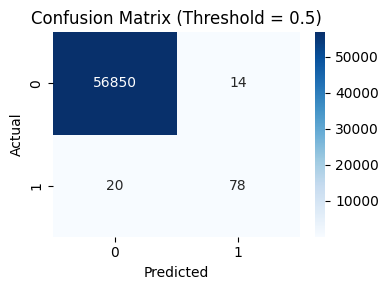

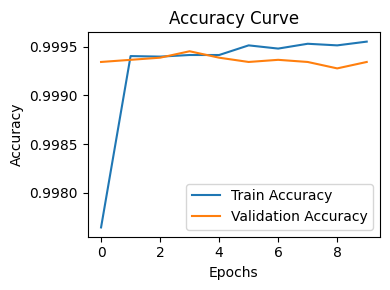

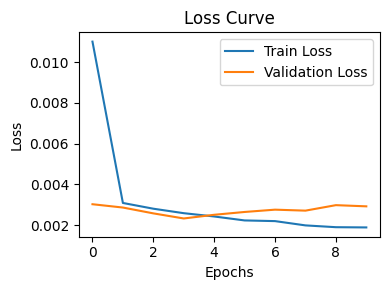

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
data = pd.read_csv("creditcard.csv")
X = data.drop("Class", axis=1)
y = data["Class"]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

y_prob = model.predict(X_test)
threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Threshold:", threshold)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Threshold = 0.5)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize=(4,3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5697/5697 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9937 - loss: 0.0294 - val_accuracy: 0.9990 - val_loss: 0.0036
Epoch 2/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9995 - loss: 0.0030 - val_accuracy: 0.9994 - val_loss: 0.0032
Epoch 3/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 0.9994 - val_loss: 0.0026
Epoch 4/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9994 - val_loss: 0.0026
Epoch 5/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9996 - loss: 0.0022 - val_accuracy: 0.9994 - val_loss: 0.0027
Epoch 6/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 7/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 0.9995 - val_loss: 0.0028
Epoch 8/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9995 - loss: 0.0021 - val

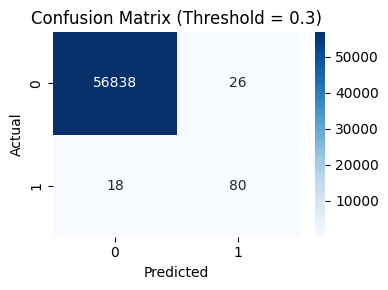

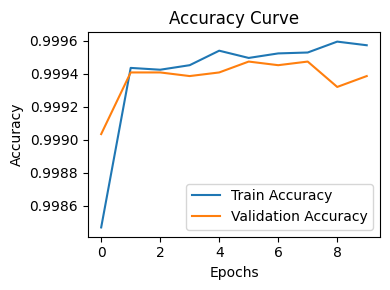

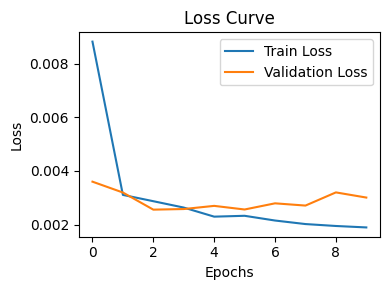

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

data = pd.read_csv("creditcard.csv")
X = data.drop("Class", axis=1)
y = data["Class"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

y_prob = model.predict(X_test)
threshold = 0.3
y_pred = (y_prob >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Threshold:", threshold)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Threshold = 0.3)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5697/5697 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9882 - loss: 0.0542 - val_accuracy: 0.9981 - val_loss: 0.0142
Epoch 2/15
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9982 - loss: 0.0136 - val_accuracy: 0.9981 - val_loss: 0.0138
Epoch 3/15
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9983 - loss: 0.0126 - val_accuracy: 0.9981 - val_loss: 0.0139
Epoch 4/15
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9983 - loss: 0.0127 - val_accuracy: 0.9981 - val_loss: 0.0141
Epoch 5/15
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9983 - loss: 0.0124 - val_accuracy: 0.9981 - val_loss: 0.0139
Epoch 6/15
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9985 - loss: 0.0108 - val_accuracy: 0.9981 - val_loss: 0.0138
Epoch 7/15
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9983 - loss: 0.0120 - val_accuracy: 0.9981 - val_loss: 0.0135
Epoch 8/15
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9985 - loss: 0.0108 - val

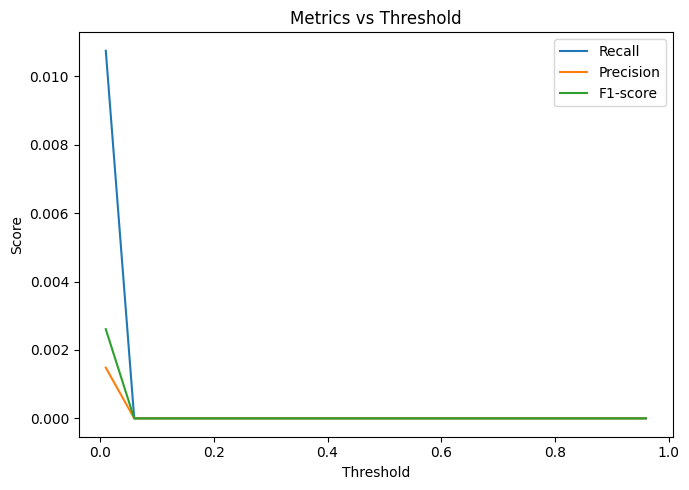

Best Threshold (Max F1): 0.01
Precision: 0.001483679525222552
Recall: 0.010752688172043012
F1-score: 0.002607561929595828
Accuracy: 0.9865699940311085


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# ---------------- Load Dataset ----------------
data = pd.read_csv("creditcard.csv")
data = data.sort_values("Time").reset_index(drop=True)

# Convert Time to timedelta index
data["Time_sec"] = pd.to_timedelta(data["Time"], unit="s")
data = data.set_index("Time_sec")

# ---------------- Behavioral Feature Extraction ----------------
window_5min = "300s"
window_1hr = "3600s"
window_24hr = "86400s"

data["txn_count_5min"] = data["Amount"].rolling(window_5min).count()
data["txn_count_1hr"] = data["Amount"].rolling(window_1hr).count()
data["txn_count_24hr"] = data["Amount"].rolling(window_24hr).count()

data["sum_amount_1hr"] = data["Amount"].rolling(window_1hr).sum()
data["mean_amount_1hr"] = data["Amount"].rolling(window_1hr).mean()
data["std_amount_1hr"] = data["Amount"].rolling(window_1hr).std()
data["max_amount_1hr"] = data["Amount"].rolling(window_1hr).max()

data["time_gap"] = data.index.to_series().diff().dt.total_seconds().fillna(0)
data["amount_ratio_mean"] = data["Amount"] / (data["mean_amount_1hr"] + 1e-6)
data["amount_diff"] = data["Amount"].diff().fillna(0)

behavioral_data = data[[
    "txn_count_5min",
    "txn_count_1hr",
    "txn_count_24hr",
    "sum_amount_1hr",
    "mean_amount_1hr",
    "std_amount_1hr",
    "max_amount_1hr",
    "time_gap",
    "amount_ratio_mean",
    "amount_diff",
    "Class"
]].fillna(0)

# ---------------- Prepare Data ----------------
X = behavioral_data.drop("Class", axis=1)
y = behavioral_data["Class"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------- Neural Network ----------------
model = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ---------------- Threshold Analysis ----------------
y_prob = model.predict(X_test).ravel()

thresholds = np.arange(0.01, 1.0, 0.05)
recalls, precisions, f1s, accuracies = [], [], [], []

for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, zero_division=0))
    f1s.append(f1_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))

# ---------------- Plot Metrics vs Threshold ----------------
plt.figure(figsize=(7,5))
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, f1s, label="F1-score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Metrics vs Threshold")
plt.legend()
plt.tight_layout()
plt.show()

# ---------------- Best Threshold ----------------
best_idx = np.argmax(f1s)
print("Best Threshold (Max F1):", thresholds[best_idx])
print("Precision:", precisions[best_idx])
print("Recall:", recalls[best_idx])
print("F1-score:", f1s[best_idx])
print("Accuracy:", accuracies[best_idx])
